# Entrenamiento de una red YOLO para el dataset de trashnet
### modelo usado: 

In [23]:
from ultralytics import YOLO
from pathlib import Path
import os
import sys

In [24]:
#definicion de variables para el entrenamiento

MODEL_PATH = "./yolo/models"
epochs = 100
imgsz = 416
batch_size = 64
optimizer = "SGD"
random_seed = 42
project_name ="./yolo/runs/trashnet"

data_path= "./data/yolo/training"
model_name = "yolo11s-cls.pt"
output_model_name = "trashnet_" + model_name
model_path = os.path.join(MODEL_PATH, model_name)

print(model_path)

./yolo/models/yolo11s-cls.pt


In [ ]:
#carga del modelo y entrenamiento

In [25]:
import torch
import sys

print (sys.executable)


print(torch.__version__)
print(torch.version.cuda)


if torch.cuda.is_available():
    print("CUDA is available.")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch will run on CPU.")

/home/martin/Documents/CEIA/CEIA-vpc2/.venv/bin/python
2.8.0+cu129
12.9
CUDA is available.
Number of GPUs: 1
Current GPU name: NVIDIA GeForce RTX 5090


In [31]:
model = YOLO(model_path)
print(model)


YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_runni

## Optimizacion del modelo:
model.tune() realiza una búsqueda automática de hiperparámetros usando Optuna como backend.
Ejecuta entrenamientos cortos para evaluar combinaciones y guarda el mejor conjunto en un archivo hyp.yaml para reutilizar en entrenamientos completos.

In [32]:
results = model.tune(
    data=data_path,
    epochs=30,            # para la optimizacion se usan pocas epochs
    imgsz=640,
    batch = batch_size,
    iterations=20,        # cantidad de pruebas de Optuna 
    device=0,
    workers=6,
    patience=10,
    seed=42,
    project=project_name,
    name= model_name + "_tune"
)



Tuner: Initialized Tuner instance with 'tune_dir=/home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/20 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'cutmix': 0.0, 'copy_paste': 0.0, 'close_mosaic': 10}
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5090, 32087MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste

Exception in thread Thread-7 (_pin_memory_loop):
Traceback (most recent call last):
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/home/martin/Documents/CEIA/CEIA-vpc2/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 61, in _pin_memory_loop
    do_one_step()
  File "/home/martin/Documents/CEIA/CEIA-vpc2/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 37, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)


Saved /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_scatter_plots.png
Saved /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_fitness.png

Tuner: 2/20 iterations complete ✅ (276.80s)
Tuner: Results saved to /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune
Tuner: Best fitness=0.98285 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/accuracy_top1': 0.9657, 'metrics/accuracy_top5': 1.0, 'val/loss': 0.11715, 'fitness': 0.98285}
Tuner: Best fitness model is /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/train
Printing '/home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/best_hyperparameters.yaml'

lr0: 0.01
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 3.0
warmup_momentum: 0.8
box: 7.5
cls: 0.5
dfl: 1.5
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
bg

terminate called without an active exception


ERROR ❌ training failure for hyperparameter tuning iteration 4
Command '['/home/martin/Documents/CEIA/CEIA-vpc2/.venv/bin/python', '-m', 'ultralytics.cfg.__init__', 'train', 'task=classify', 'mode=train', 'model=./yolo/models/yolo11s-cls.pt', 'data=./data/yolo/training', 'epochs=30', 'time=None', 'patience=10', 'batch=64', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=0', 'workers=6', 'project=./yolo/runs/trashnet', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=auto', 'verbose=True', 'seed=42', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=9', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'compile=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=True', 'split=val', 'save_json=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=True', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=Fa

Exception in thread Thread-7 (_pin_memory_loop):
Traceback (most recent call last):
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/home/martin/Documents/CEIA/CEIA-vpc2/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 61, in _pin_memory_loop
    do_one_step()
  File "/home/martin/Documents/CEIA/CEIA-vpc2/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 37, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/multiprocessing/queues.py", line 12

Saved /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_scatter_plots.png
Saved /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_fitness.png

Tuner: 17/20 iterations complete ✅ (2343.93s)
Tuner: Results saved to /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune
Tuner: Best fitness=0.98417 observed at iteration 17
Tuner: Best fitness metrics are {'metrics/accuracy_top1': 0.96834, 'metrics/accuracy_top5': 1.0, 'val/loss': 0.09416, 'fitness': 0.98417}
Tuner: Best fitness model is /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/train
Printing '/home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/best_hyperparameters.yaml'

lr0: 0.00993
lrf: 0.01475
momentum: 0.98
weight_decay: 0.00039
warmup_epochs: 1.93506
warmup_momentum: 0.50259
box: 4.73608
cls: 0.58605
dfl: 1.23043
hsv_h: 0.01827
hsv_s: 0.65316
hsv_v: 0.4
degrees: 0.0
translate: 0.13751
scale: 0.48369
shear: 0.0

Exception in thread Thread-7 (_pin_memory_loop):
Traceback (most recent call last):
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/home/martin/Documents/CEIA/CEIA-vpc2/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 61, in _pin_memory_loop
    do_one_step()
  File "/home/martin/Documents/CEIA/CEIA-vpc2/.venv/lib/python3.12/site-packages/torch/utils/data/_utils/pin_memory.py", line 37, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/martin/snap/code/205/.local/share/uv/python/cpython-3.12.11-linux-x86_64-gnu/lib/python3.12/multiprocessing/queues.py", line 12

Saved /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_scatter_plots.png
Saved /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_fitness.png

Tuner: 20/20 iterations complete ✅ (2759.87s)
Tuner: Results saved to /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune
Tuner: Best fitness=0.98417 observed at iteration 17
Tuner: Best fitness metrics are {'metrics/accuracy_top1': 0.96834, 'metrics/accuracy_top5': 1.0, 'val/loss': 0.09416, 'fitness': 0.98417}
Tuner: Best fitness model is /home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/train
Printing '/home/martin/Documents/CEIA/CEIA-vpc2/yolo/runs/trashnet/yolo11s-cls.pt_tune/best_hyperparameters.yaml'

lr0: 0.00993
lrf: 0.01475
momentum: 0.98
weight_decay: 0.00039
warmup_epochs: 1.93506
warmup_momentum: 0.50259
box: 4.73608
cls: 0.58605
dfl: 1.23043
hsv_h: 0.01827
hsv_s: 0.65316
hsv_v: 0.4
degrees: 0.0
translate: 0.13751
scale: 0.48369
shear: 0.0

YOLO tune encontró como mejores hiper-parametros:
---
    lr0: 0.00993
    lrf: 0.01475
    momentum: 0.98
    weight_decay: 0.00039
    warmup_epochs: 1.93506
    warmup_momentum: 0.50259
    box: 4.73608
    cls: 0.58605
    dfl: 1.23043
    hsv_h: 0.01827
    hsv_s: 0.65316
    hsv_v: 0.4
    degrees: 0.0
    translate: 0.13751
    scale: 0.48369
---

Conclusiones:

El fitness más alto alcanzado fue 0.984, lo que es muy bueno para este tipo de tarea.

La precisión top-1 llegó a 96.8%, mientras que la precisión top-5 fue 100%, lo que indica que el modelo está reconociendo muy bien las clases y casi siempre incluye la clase correcta entre sus predicciones más probables.

La pérdida de validación es baja (0.094), lo cual confirma una buena generalización.

Los hiperparámetros ajustados muestran un learning rate inicial relativamente bajo (0.0099) y un momentum alto (0.98), lo que ayuda a la estabilidad.

Se observa un uso fuerte de aumentos de datos como hsv_s (0.65) y scale (0.48), lo que favorece la robustez del modelo.

Algunas técnicas como cutmix y copy_paste quedaron en 0, es decir, no fueron necesarias en este dataset.

Estos valores indican que el modelo logró un muy buen balance entre precisión y pérdida, aprovechando bien la regularización con data augmentation sin necesidad de mezclas agresivas como cutmix.

# Resultados graficos del tuning:

![Tune Fitness](./yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_fitness.png)

![Tune Scatterplot](./yolo/runs/trashnet/yolo11s-cls.pt_tune/tune_scatter_plots.png)





In [ ]:
import yaml

INT_KEYS = ["close_mosaic", "epochs", "batch", "workers"]

def load_hyperparameters(yaml_path):
    """
    Carga los hiperparámetros desde un YAML y corrige tipos según lo que espera YOLO.
    """
    with open(yaml_path, "r") as f:
        hyp_dict = yaml.safe_load(f)

    # Convertir a int los valores que deben ser int
    for k in INT_KEYS:
        if k in hyp_dict:
            hyp_dict[k] = int(hyp_dict[k])

    return hyp_dict

In [34]:
tuned_hyp = "yolo/runs/trashnet/yolo11s-cls.pt_tune/best_hyperparameters.yaml"
hyp_params = load_hyperparameters(tuned_hyp)
    
    
    #Entrenamiento del modelo ahora si usando los mejores parametros del tuning.
results = model.train(
    data=data_path,
    epochs=epochs,
    imgsz=imgsz,
    batch=batch_size,
    name=output_model_name,
    device=0,
    workers=6,
    augment=True,
    patience=10,
    seed=random_seed,
    **hyp_params,
    project=project_name)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 5090, 32087MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=64, bgr=0.0, box=4.73608, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.58605, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/yolo/training, degrees=0.0, deterministic=True, device=0, dfl=1.23043, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.52987, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01827, hsv_s=0.65316, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00993, lrf=0.01475, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=./yolo/models/yolo11s-cls.pt, momentum=0.98, mosaic=0.94542, multi_scale=False, name=trashnet_yolo11s-cls.pt, nbs=64, nms=False, opset=None, optimize=False, optimizer=aut

### Resultados del entrenamiento:

![Matriz de confusion](./yolo/runs/trashnet/train3/confusion_matrix.png)

![Resultados](yolo/runs/trashnet/train3/results.png)



Se encontraron 3 archivos:


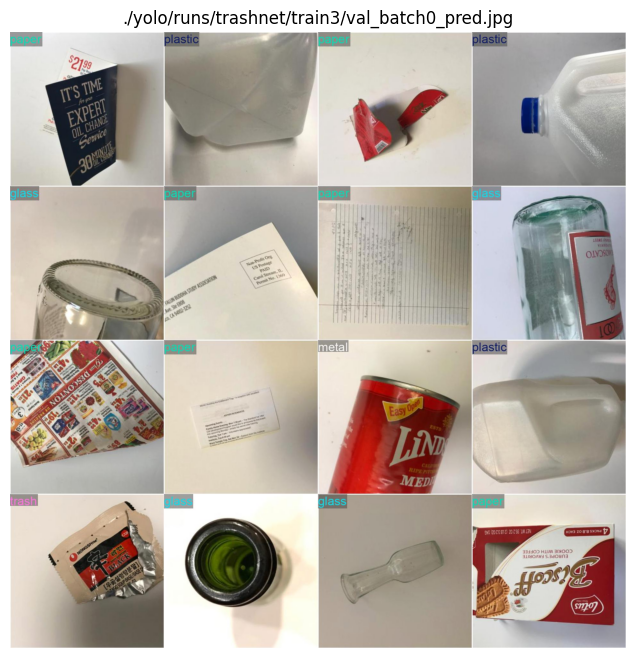

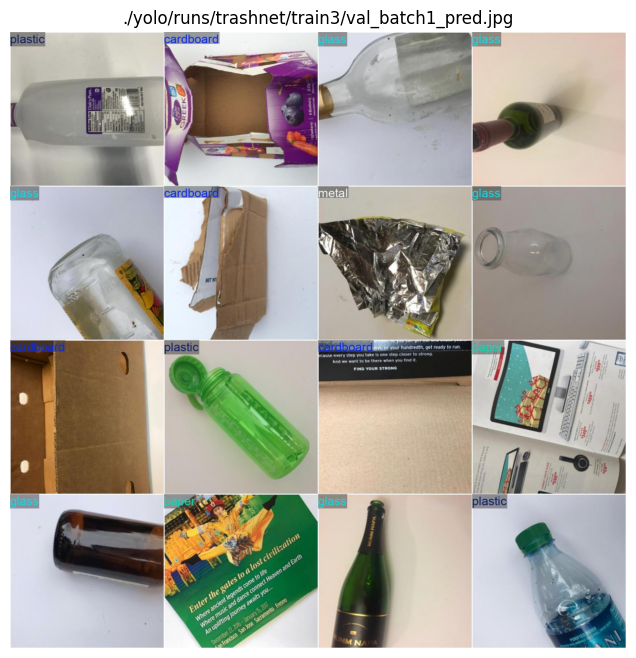

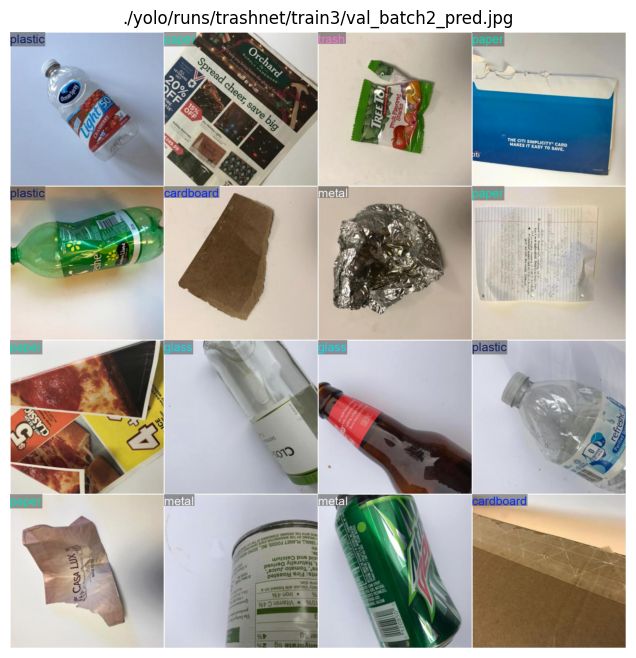

In [39]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import cv2

# Ruta donde están las imágenes
path = "./yolo/runs/trashnet/train3/val_batch*_pred.jpg"

# Buscar todos los archivos que matchean el patrón
files = sorted(glob.glob(path))

print(f"Se encontraron {len(files)} archivos:")

# Mostrar cada imagen
for f in files:
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f)
    plt.axis("off")
    plt.show()

# Conlcusiones 

El entrenamiento de la red YOLO se realizo en solo 28 epocas al no haber mejoras desde la 18. Esto indica que el modelo ya había llegado a su mejor punto relativamente rápido.

Precisión top-1 ≈ 0.90 y top-5 = 1.0: quiere decir que en el 90% de los casos el modelo acierta la clase correcta como la primera opción, y en todos los casos la clase verdadera aparece dentro de las 5 predicciones. Para un modelo s (small) es bastante sólido.

Loss bajando bien: de 0.15 a 0.13 antes de parar. No hay signos de underfitting.

Dataset: 1766 imágenes de entrenamiento, 379 de validación y 379 de test, repartidas en 6 clases. Al no ser un dataset muy grande puede favorecer un ajuste muy preciso en validación/test.

Resultados en test = 100% correctos: esto es raro en datasets reales, pero puede pasar si:

 - El dataset es pequeño y las clases son visualmente muy distintas.
 - Existe alguna fuga de datos (ejemplo: imágenes casi duplicadas en train y test) --> Debiera de no ser asi dado el EDA realizado en las notebooks anteriores.
 - El modelo se beneficia de pocas variaciones intra-clase (p. ej. cada clase siempre se ve bastante similar).